# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading Data

In [4]:
URL = "http://bit.ly/w-data"
df = pd.read_csv(URL)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualizing Hours and Scores data set examples

<function matplotlib.pyplot.show(*args, **kw)>

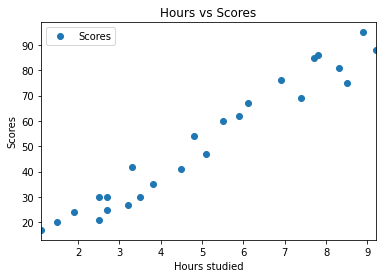

In [5]:
df.plot(x="Hours", y="Scores", style='o')
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.show

# Step 1: Splitting the data

In [6]:
X = df.iloc[:,0].values
X = X.reshape(-1,1)
Y = df.iloc[:,-1].values
Y = Y.reshape(-1,1)

* **Splitting X and Y into Train and Test.**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# Step 2: Selecting the model

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

# Step 3: Visualizing the predicted line

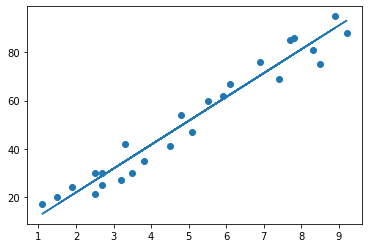

In [9]:
predicted_line = regressor.coef_ * X + regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,predicted_line)
plt.show()

# Step 4: Predicting score

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
y_pred = np.array(y_pred).ravel()
Y_test = np.array(Y_test).ravel()
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Step 5: Real and predicted score sample

In [12]:
real_pred = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
real_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step 6: The predicted score if a student studies for 9.25 hrs/day

In [20]:
test_sample= np.array([[9.25]])
sample_predict = regressor.predict(test_sample)
sample_predict[0]

array([93.69173249])

# Step 7: Evaluating the model

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

21.5987693072174

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_pred)

4.183859899002975